In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
from os import path

In [2]:
data_dir = path.join('..','data','processed_data')
interim_dir = path.join('..','data','interim')

In [3]:
ica_data = load_json_model(path.join(interim_dir,'bsu_raw.json.gz'))

In [4]:
DF_enrichments = pd.read_csv(path.join(data_dir,'functional_enrichments.csv'),index_col=0)

# Add iModulon category

In [5]:
for i,row in ica_data.imodulon_table.iterrows():
    if pd.notnull(row.regulator):
        ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    elif pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [6]:
ica_data.imodulon_table.head()

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category
S-box,S-box,1.436720e-30,8.620321e-30,0.652174,0.576923,0.612245,15.0,26.0,23,1.0,NaN,0.010646,regulatory
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,0.006978,uncharacterized
WalR,WalR,1.897147e-12,2.656006e-11,0.388889,0.291667,0.333333,7.0,24.0,18,1.0,NaN,0.003324,regulatory
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN,NaN,0.001433,uncharacterized
Rex,Rex,1.416977e-19,7.084883e-19,1.000000,0.583333,0.736842,7.0,12.0,7,1.0,NaN,0.004055,regulatory


# Inspect all iModulons without an automated annotation

In [7]:
unchar_imods = ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

In [8]:
unchar_imods

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,0.006978,uncharacterized
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN,NaN,0.001433,uncharacterized
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0.002899,uncharacterized
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,0.000801,uncharacterized
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,NaN,NaN,0.000668,uncharacterized
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,0.004806,uncharacterized
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,0.005357,uncharacterized
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,0.005535,uncharacterized
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,0.009513,uncharacterized
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,0.001786,uncharacterized


### iModulon 1: Unknown

In [9]:
ica_data.view_imodulon(1)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_00160,0.123163,sleL,AL009126.3,BSU00160,23868,25151,-,spore peptidoglycan N-acetylglucosaminidase,Cell wall/membrane/envelope biogenesis,P37531,Op9,"SigE,SigB,SpoIIID"
BSU_01960,0.118793,skfF,AL009126.3,BSU01960,217697,219040,+,sporulation killing factor biosynthesis and ex...,Function unknown,O31428,Op145,"Spo0A,SigA,PhoP,AbrB"
BSU_02070,0.118850,csgA,AL009126.3,BSU02070,228066,228314,+,sporulation-specific SASP protein,Function unknown,P54379,Op154,"SpoVT,SigG"
BSU_02220,0.062502,ybfI,AL009126.3,BSU02220,242834,243661,-,putative transcriptional regulator (AraC/XylS ...,Transcription,O31449,Op168,NaN
BSU_02660,0.063209,ycbU,AL009126.3,BSU02660,287499,288611,+,putative lyase (PLP-dependent),Amino acid transport and metabolism,P42253,Op201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
BSU_39060,0.042611,citH,AL009126.3,BSU39060,4010404,4011684,+,secondary transporter of divalent metal ions/c...,Energy production and conversion,P42308,Op3019,"SigE,SigF"
BSU_39200,0.060623,yxzC,AL009126.3,BSU39200,4021896,4022264,-,putative nucleic acid binding protein,No COG annotation,O32286,Op3032,NaN
BSU_39330,0.059463,abnB,AL009126.3,BSU39330,4039466,4040875,-,arabinan endo-1%2C5-alpha-L-arabinosidase ([Ca...,Carbohydrate transport and metabolism,P42293,Op3040,"SigA,SigH,CcpA"
BSU_39500,0.043344,yxeM,AL009126.3,BSU39500,4059488,4060282,-,putative ABC transporter (binding lipoprotein),Cell wall/membrane/envelope biogenesis,P54952,Op3045,"SigA,CymR"


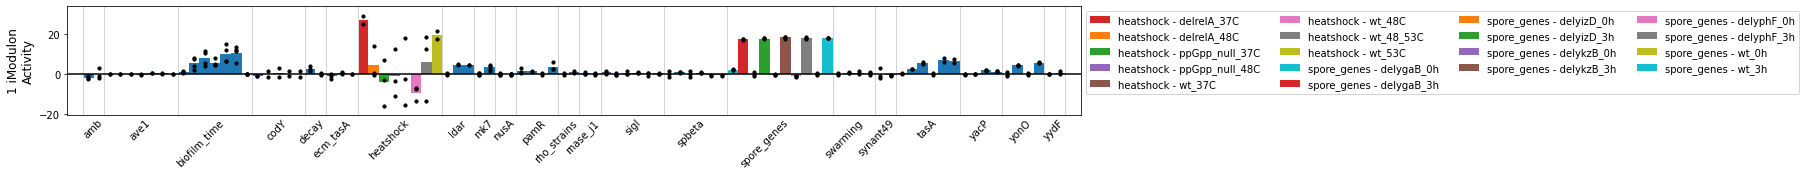

In [10]:
plot_activities(ica_data,1,highlight=['heatshock','spore_genes'])

In [11]:
DF_enrichments[DF_enrichments.imodulon=='1'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [12]:
# Update the ICA data object

ica_data.rename_imodulons({1:'uncharacterized-1'})

### iModulon 3: Unknown
This iModulon is likely some technical artifact from the MK7 project.

In [13]:
ica_data.view_imodulon(3)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_00220,0.074081,yaaL,AL009126.3,BSU00220,29481,29705,+,conserved protein of unknown function,Function unknown,P37533,Op15,NaN
BSU_01790,0.146841,ybbU,AL009126.3,BSU01790,202126,202266,+,hypothetical protein,No COG annotation,A0A2K4Z9G0,Op134,NaN
BSU_01920,0.038189,skfB,AL009126.3,BSU01920,214175,215407,+,synthesis of sporulation killing factor A,"Translation, ribosomal structure and biogenesis",O31423,Op145,"Spo0A,SigA,PhoP,AbrB"
BSU_02000,-0.045146,ybdJ,AL009126.3,BSU02000,221258,221929,+,two-component system response regulator [YbdK],Signal transduction mechanisms,O31432,Op147,NaN
BSU_02220,-0.052457,ybfI,AL009126.3,BSU02220,242834,243661,-,putative transcriptional regulator (AraC/XylS ...,Transcription,O31449,Op168,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
BSU_40160,-0.107328,liaK,AL009126.3,BSU40160,4125742,4126500,-,membrane metalloprotease acting on modified fa...,"Post-translational modification, protein turno...",Q45594,Op3080,"Rok,SigA,AbrB"
BSU_40460,0.113660,yyzB,AL009126.3,BSU40460,4159253,4159456,-,conserved protein of unknown function,No COG annotation,O32296,Op3102,NaN
BSU_40574,0.072859,yyzJ,AL009126.3,NaN,4171625,4171789,-,hypothetical protein,Function unknown,NaN,Op3113,NaN
BSU_40610,0.041476,yybK,AL009126.3,BSU40610,4175117,4175872,+,putative transporter permease subunit,Function unknown,P37493,Op3117,"Rok,DnaA"


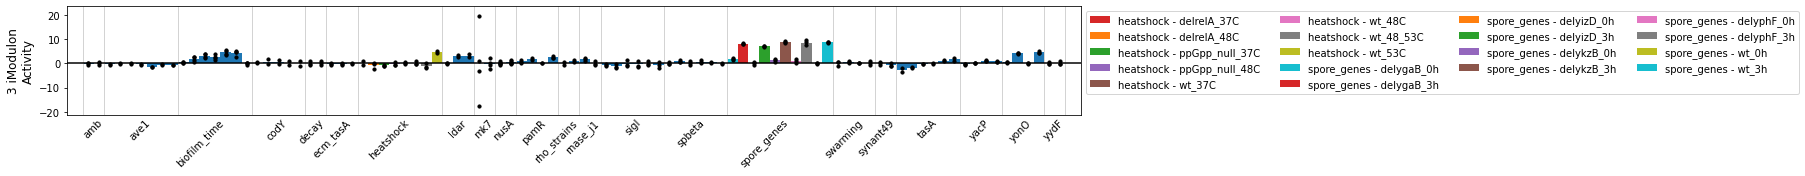

In [14]:
plot_activities(ica_data,3,highlight=['heatshock','spore_genes'])

In [15]:
DF_enrichments[DF_enrichments.imodulon=='3'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
16,3,NaN,0.000319,0.041976,0.151316,0.075658,0.100877,23.0,304.0,152.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
15,3,NaN,0.000004,0.001035,0.065789,0.212766,0.100503,10.0,47.0,152.0,NaN,NaN,NaN,NaN,pseudogenes
17,3,NaN,0.000440,0.041976,0.144737,0.075601,0.099323,22.0,291.0,152.0,NaN,NaN,NaN,NaN,prophages


In [16]:
# Update the ica_data object
ica_data.rename_imodulons({3:'uncharacterized-2'})

### iModulon 6: ybc Operon
This iModulon contains four genes starting with ybc, and ndhF, which are all likely in the same operon. Little is known about the genes except that they are part of prophage 1.

In [17]:
ica_data.view_imodulon(6)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_01830,0.272368,ndhF,AL009126.3,BSU01830,205409,206926,+,putative NADH dehydrogenase%3B prophage 1 region,Energy production and conversion,P39755,Op137,NaN
BSU_01845,0.265787,ybcC,AL009126.3,BSU01845,206941,209556,+,conserved transmembrane protein coupled to NAD...,Function unknown,O34688,Op138,NaN
BSU_01860,0.254484,ybcF,AL009126.3,BSU01860,209633,210160,+,putative enzyme%3B prophage 1 region,Inorganic ion transport and metabolism,O34823,Op139,NaN
BSU_01870,0.260051,ybcH,AL009126.3,BSU01870,210224,210514,+,conserved protein of unknown function%3B proph...,No COG annotation,O34795,Op140,NaN
BSU_01880,0.199487,ybcI,AL009126.3,BSU01880,210572,210946,+,conserved hypothetical protein%3B prophage 1 r...,Function unknown,O34380,Op141,NaN


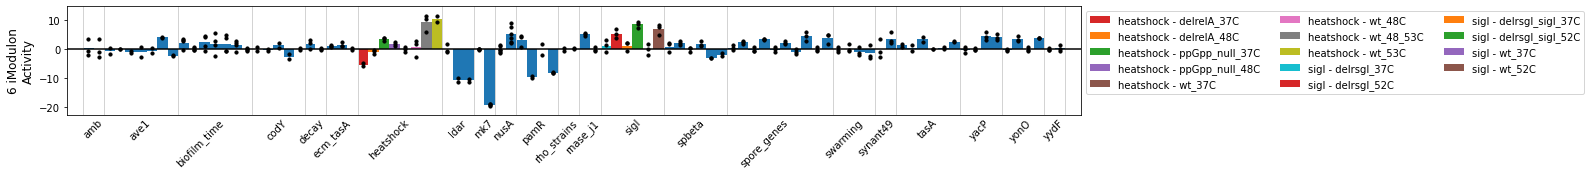

In [18]:
plot_activities(ica_data,6,highlight=['heatshock','sigI'])

In [19]:
DF_enrichments[DF_enrichments.imodulon=='6'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [20]:
# Update the ICA data object

ica_data.rename_imodulons({6:'ybc-operon'})
ica_data.imodulon_table.loc['ybc-operon','category'] = 'functional'

### iModulon 7: Putative yvaF
We predict that this iModulon is regulated by yvaF, a putative transcriptional regulator that is in the iModulon.

In [21]:
ica_data.view_imodulon(7)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_33540,0.125035,azoRB,AL009126.3,BSU33540,3445442,3446077,-,NADH:dichloroindophenol oxidoreductase (2-meth...,Lipid transport and metabolism,O32224,Op2636,"SigA,SigG,MhqR"
BSU_33550,0.230015,yvaC,AL009126.3,BSU33550,3446237,3448132,-,putative integral inner membrane protein,Function unknown,O32225,Op2637,NaN
BSU_33560,0.349249,yvaD,AL009126.3,BSU33560,3448295,3448696,-,putative integral inner membrane protein,Function unknown,O32226,Op2638,NaN
BSU_33570,0.357373,yvaE,AL009126.3,BSU33570,3448693,3449052,-,putative metabolite-efflux transporter,Inorganic ion transport and metabolism,O32227,Op2639,NaN
BSU_33580,0.343573,yvaF,AL009126.3,BSU33580,3449049,3449621,-,putative transcriptional regulator,Transcription,O32228,Op2640,NaN


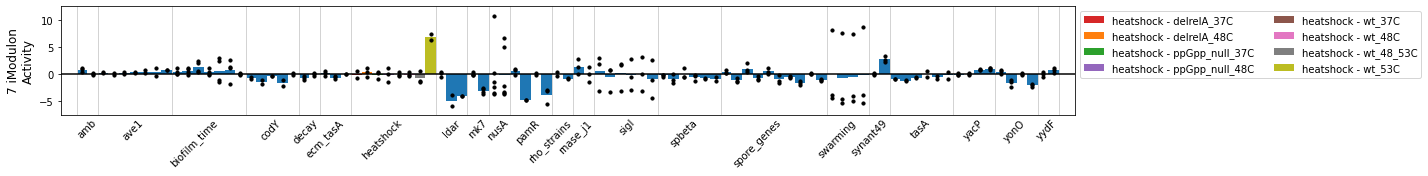

In [22]:
plot_activities(ica_data,7,highlight=['heatshock'])

In [23]:
DF_enrichments[DF_enrichments.imodulon=='7'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [24]:
# Update the ica_data object
ica_data.rename_imodulons({7:'YvaF'})
ica_data.imodulon_table.loc['YvaF','category'] = 'functional'

### iModulon 9: Unknown
Another technical artifact from the MK7 project

In [25]:
ica_data.view_imodulon(9)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_00240,-0.041348,csfB,AL009126.3,BSU00240,35531,35725,+,forespore-specific anti-sigma factor,Function unknown,P37534,Op17,"SigK,SigF"
BSU_01620,0.045969,feuB,AL009126.3,BSU01620,181347,182351,-,ferri-bacillibactin permease,Inorganic ion transport and metabolism,P40410,Op121,"SigA,Btr,Fur"
BSU_01790,-0.099195,ybbU,AL009126.3,BSU01790,202126,202266,+,hypothetical protein,No COG annotation,A0A2K4Z9G0,Op134,NaN
BSU_02180,-0.086825,ybfEc,AL009126.3,NaN,238164,238448,-,conserved protein of unknown function (C-termi...,No COG annotation,NaN,Op163,NaN
BSU_02785,-0.033619,BSU_02785,AL009126.3,BSU02785,300525,300656,-,hypothetical protein,No COG annotation,A0A2K4Z9F5,Op212,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
BSU_40529,0.046294,yyzH,AL009126.3,BSU40529,4166815,4166964,-,hypothetical protein,No COG annotation,C0H3U2,Op3106,SigB
BSU_40578,0.105474,yyzK,AL009126.3,NaN,4172259,4172405,-,hypothetical protein,No COG annotation,NaN,Op3115,NaN
BSU_40579,0.121683,yyzL,AL009126.3,NaN,4172387,4172536,-,hypothetical protein,No COG annotation,NaN,Op3116,NaN
BSU_40640,-0.039631,yybH,AL009126.3,BSU40640,4177756,4178145,-,conserved hypothetical protein,Function unknown,P37496,Op3118,NaN


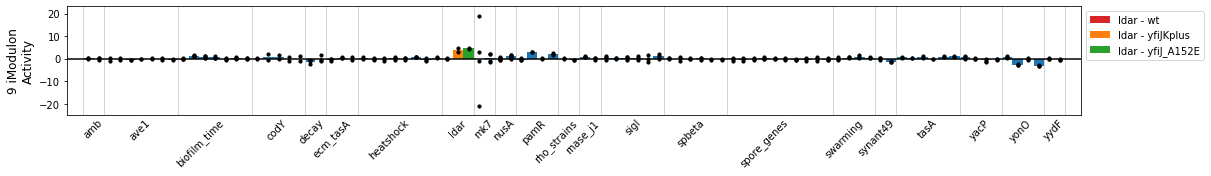

In [26]:
plot_activities(ica_data,9,highlight=['ldar'])

In [27]:
DF_enrichments[DF_enrichments.imodulon=='9'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
36,9,NaN,1.455111e-07,0.000042,0.070588,0.255319,0.110599,12.0,47.0,170.0,NaN,NaN,NaN,NaN,pseudogenes
37,9,NaN,1.078468e-04,0.013181,0.152941,0.085526,0.109705,26.0,304.0,170.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
38,9,NaN,1.382586e-04,0.013181,0.147059,0.085911,0.108460,25.0,291.0,170.0,NaN,NaN,NaN,NaN,prophages
39,9,NaN,5.876380e-04,0.042016,0.305882,0.059908,0.100193,52.0,868.0,170.0,NaN,NaN,NaN,NaN,proteins of unknown function


In [28]:
# Update the ica_data object
ica_data.rename_imodulons({9:'uncharacterized-3'})

### iModulon 51: Unknown

In [29]:
ica_data.view_imodulon(51)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_04530,0.076764,fbpB,AL009126.3,BSU04530,506322,506501,-,regulator of iron homeostasis,Function unknown,P96609,Op338,Fur
BSU_04990,0.079265,yddJ,AL009126.3,BSU04990,545595,545975,+,ICEBs1 mobile element: putative lipoprotein of...,Function unknown,P96647,Op377,"ImmR,AbrB"
BSU_25565,0.071803,BSU_25565,AL009126.3,BSU25565,2637179,2637328,-,hypothetical protein,No COG annotation,A0A2K4Z9K3,Op2018,NaN
BSU_27600,0.155245,rsh,AL009126.3,BSU27600,2820529,2822733,-,GTP pyrophosphokinase (RelA/SpoT),Transcription,O54408,Op2206,NaN


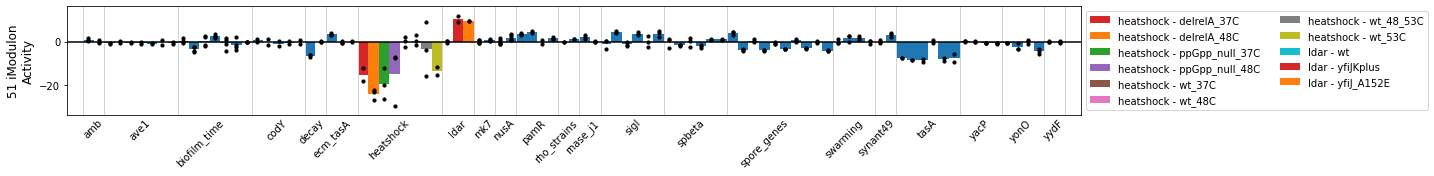

In [30]:
plot_activities(ica_data,51,highlight=['heatshock','ldar'])

In [31]:
DF_enrichments[DF_enrichments.imodulon=='51'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value


In [32]:
# Update the ica_data object
ica_data.rename_imodulons({51:'uncharacterized-4'})

### iModulon 52: ykzB-related
This iModulon is only down-regulated during sporulation when ykzB is deleted.

In [33]:
ica_data.view_imodulon(52)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_18130,0.095418,eglS,AL009126.3,BSU18130,1940625,1942124,+,endo-1%2C4-beta-glucanase,Carbohydrate transport and metabolism,P10475,Op1382,SigA
BSU_18140,0.156711,ynfE,AL009126.3,BSU18140,1942192,1942455,+,conserved hypothetical protein,No COG annotation,Q45069,Op1383,NaN
BSU_18150,0.083893,xynC,AL009126.3,BSU18150,1942714,1943982,-,secreted endo-xylanase,Cell wall/membrane/envelope biogenesis,Q45070,Op1384,AbrB
BSU_18160,0.082117,xynD,AL009126.3,BSU18160,1944113,1945654,-,arabinoxylan arabinofuranohydrolase,Carbohydrate transport and metabolism,Q45071,Op1385,AbrB
BSU_18190,0.083229,yngC,AL009126.3,BSU18190,1947668,1948264,+,putative integral inner membrane protein%2C ph...,Function unknown,O31823,Op1388,"SigM,YclJ"
BSU_18200,0.145381,nrnB,AL009126.3,BSU18200,1948313,1949512,-,oligoribonuclease (nanoRNase),Function unknown,O31824,Op1389,NaN
BSU_18210,0.208872,ldeE,AL009126.3,BSU18210,1949682,1951217,-,methylcrotonoyl-CoA carboxylase subunit (leuci...,Lipid transport and metabolism,O31825,Op1390,SigE
BSU_18220,0.227312,ldeF,AL009126.3,BSU18220,1951228,1952010,-,methylglutaconyl-CoA hydratase (leucine degrad...,Lipid transport and metabolism,O34893,Op1390,SigE
BSU_18230,0.223275,ldeG,AL009126.3,BSU18230,1952031,1952930,-,hydroxymethylglutaryl-CoA lyase (leucine degra...,Amino acid transport and metabolism,O34873,Op1390,SigE
BSU_18239,0.237199,lgeHB,AL009126.3,BSU18239,1952945,1953166,-,methylcrotonyl-CoA carboxylase%3B biotinylated...,Lipid transport and metabolism,C0H419,Op1390,SigE


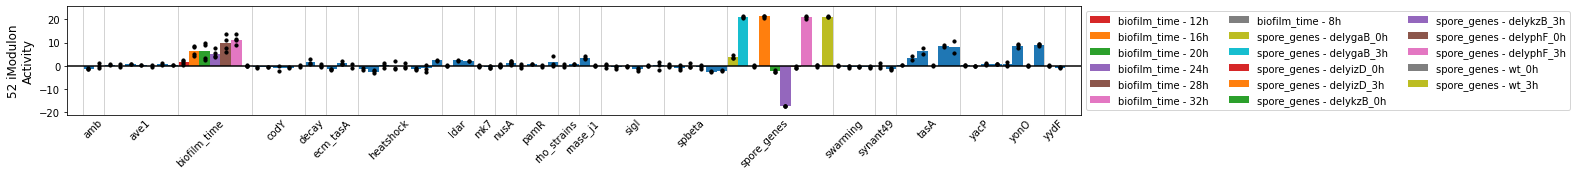

In [34]:
plot_activities(ica_data,52,highlight=['biofilm_time','spore_genes'])

In [35]:
DF_enrichments[DF_enrichments.imodulon=='52'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
273,52,NaN,3.396203e-13,9.713141e-11,0.4375,0.318182,0.368421,7.0,22.0,16.0,NaN,NaN,NaN,NaN,utilization of branched-chain amino acids
73,52,NaN,4.550649e-04,9.310647e-02,0.1250,0.222222,0.160000,2.0,9.0,16.0,NaN,M00082,NaN,"Fatty acid biosynthesis, initiation",NaN
274,52,NaN,3.585559e-09,5.127349e-07,0.4375,0.093333,0.153846,7.0,75.0,16.0,NaN,NaN,NaN,NaN,utilization of amino acids
74,52,NaN,6.922414e-04,9.310647e-02,0.1250,0.181818,0.148148,2.0,11.0,16.0,NaN,M00376,NaN,3-Hydroxypropionate bi-cycle,NaN
279,52,NaN,9.095451e-05,3.716141e-03,0.1875,0.120000,0.146341,3.0,25.0,16.0,NaN,NaN,NaN,NaN,utilization of other polymeric carbohydrates
95,52,NaN,1.587503e-04,3.571881e-02,0.1875,0.100000,0.130435,3.0,30.0,16.0,NaN,map01212,Fatty acid metabolism,NaN,NaN
277,52,NaN,1.607265e-05,9.193555e-04,0.4375,0.027559,0.051852,7.0,279.0,16.0,NaN,NaN,NaN,NaN,amino acid/ nitrogen metabolism
278,52,NaN,4.191706e-05,1.998047e-03,0.4375,0.023810,0.045161,7.0,294.0,16.0,NaN,NaN,NaN,NaN,sporulation proteins/ other
275,52,NaN,9.165722e-07,8.737989e-05,0.6250,0.021277,0.041152,10.0,470.0,16.0,NaN,NaN,NaN,NaN,sporulation proteins
276,52,NaN,4.970116e-06,3.553633e-04,0.6250,0.017762,0.034542,10.0,568.0,16.0,NaN,NaN,NaN,NaN,sporulation


In [36]:
# Update the ica_data object
ica_data.rename_imodulons({52:'ykzB-related'})
ica_data.imodulon_table.loc['ykzB-related','category'] = 'functional'

### iModulon 61: early biofilm

In [37]:
ica_data.view_imodulon(61)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_03359,0.070463,yczL,AL009126.3,BSU03359,365850,366035,+,hypothetical protein,No COG annotation,C0H3U7,Op251,"SigA,Zur"
BSU_07560,0.060866,pelA,AL009126.3,BSU07560,827993,829255,+,pectate lyase,Carbohydrate transport and metabolism,P39116,Op602,"ComA,TnrA,CcpA"
BSU_08230,0.084936,catD,AL009126.3,BSU08230,897588,897992,+,catechol-2%2C3-dioxygenase membrane subunit,Function unknown,P54720,Op640,"SigA,CatR,YodB,Fur"
BSU_08240,0.082969,catE,AL009126.3,BSU08240,898010,898867,+,catechol-2%2C3-dioxygenase subunit,Function unknown,P54721,Op640,"SigA,CatR,YodB,Fur"
BSU_10300,0.060752,aprE,AL009126.3,BSU10300,1104423,1105568,-,serine alkaline protease (Ca(2+)-dependent sub...,"Post-translational modification, protein turno...",P04189,Op807,"SigA,SinR,CodY,DegU,AbrB,ScoC"
BSU_11040,0.109451,yitM,AL009126.3,BSU11040,1182448,1183032,-,conserved hypothetical protein,No COG annotation,O06748,Op864,NaN
BSU_11055,0.074836,yitO,AL009126.3,BSU11055,1183029,1183958,-,putative integral inner membrane protein with ...,No COG annotation,O06750,Op864,NaN
BSU_11070,0.066387,yitP,AL009126.3,BSU11070,1183943,1184479,-,conserved hypothetical protein,Function unknown,O06751,Op864,NaN
BSU_12200,0.081363,yjiA,AL009126.3,BSU12200,1290675,1290953,-,hypothetical protein,No COG annotation,O34679,Op955,NaN
BSU_13190,0.081301,ispA,AL009126.3,BSU13190,1386024,1386983,-,intracellular serine protease,"Post-translational modification, protein turno...",P11018,Op1028,"SigA,CodY"


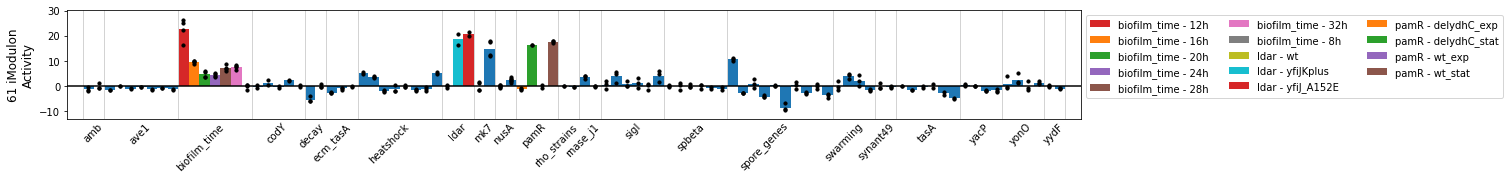

In [38]:
plot_activities(ica_data,61,highlight=['biofilm_time','ldar','pamR'])

In [39]:
DF_enrichments[DF_enrichments.imodulon=='61'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
341,61,NaN,1.539137e-10,4.401931e-08,0.142857,0.833333,0.243902,5.0,6.0,35.0,NaN,NaN,NaN,NaN,capsule biosynthesis and degradation
342,61,NaN,3.134567e-06,4.482431e-04,0.171429,0.113208,0.136364,6.0,105.0,35.0,NaN,NaN,NaN,NaN,biosynthesis of antibacterial compounds
343,61,NaN,3.508377e-05,3.344653e-03,0.171429,0.075000,0.104348,6.0,80.0,35.0,NaN,NaN,NaN,NaN,miscellaneous metabolic pathways


In [40]:
# Update ICA data object
ica_data.rename_imodulons({61:'early-biofilm'})
ica_data.imodulon_table.loc['early-biofilm','category'] = 'functional'

### iModulon 68: Unknown

In [41]:
ica_data.view_imodulon(68)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_00440,0.091876,veg,AL009126.3,BSU00440,52763,53023,+,conserved hypothetical protein,Function unknown,P37466,Op35,SigA
BSU_00450,0.056840,sspF,AL009126.3,BSU00450,53183,53368,+,small acid-soluble spore protein (alpha/beta-t...,Function unknown,P37549,Op36,SigG
BSU_01889,0.053660,ybzH,AL009126.3,BSU01889,211429,211731,+,putative transcriptional regulator (ArsR famil...,Transcription,C0H3S9,Op142,NaN
BSU_02785,0.048965,BSU_02785,AL009126.3,BSU02785,300525,300656,-,hypothetical protein,No COG annotation,A0A2K4Z9F5,Op212,NaN
BSU_03780,0.111154,phrC,AL009126.3,BSU03780,429963,430085,+,secreted regulator of the activity of phosphat...,No COG annotation,P94416,Op284,"SigA,ComA,CodY,SigH,CcpA"
BSU_05120,0.060560,cspC,AL009126.3,BSU05120,559264,559464,+,cold-shock protein,Transcription,P39158,Op391,NaN
BSU_06269,0.078490,ydzJ,AL009126.3,BSU06269,680907,681065,-,hypothetical protein,No COG annotation,O24817,Op503,NaN
BSU_09630,0.116020,yhdX,AL009126.3,BSU09630,1038653,1038760,+,conserved hypothetical protein,No COG annotation,O07593,Op745,NaN
BSU_09700,0.188637,bmrB,AL009126.3,BSU09700,1045037,1045198,+,regulator leader peptide,No COG annotation,O07551,Op752,"AbrB,BmrB"
BSU_10230,0.058568,yhfH,AL009126.3,BSU10230,1098120,1098260,-,conserved protein of unknown function,Function unknown,O07606,Op800,YlxR


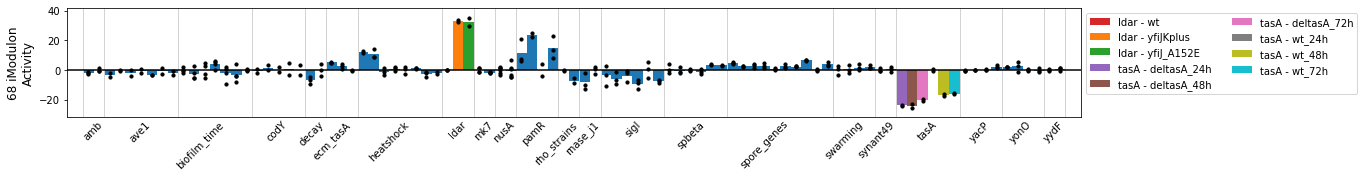

In [42]:
plot_activities(ica_data,68,highlight=['ldar','tasA'])

In [43]:
DF_enrichments[DF_enrichments.imodulon=='68'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
368,68,NaN,0.000035,0.010114,0.074074,0.25,0.114286,4.0,16.0,54.0,NaN,NaN,NaN,NaN,control of response regulators/ other
369,68,NaN,0.000208,0.029685,0.055556,0.30,0.093750,3.0,10.0,54.0,NaN,NaN,NaN,NaN,short peptides


In [44]:
# Update the ica_data object
ica_data.rename_imodulons({68:'uncharacterized-5'})

## iModulon 69: cssRS

In [45]:
ica_data.view_imodulon(69)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_07770,0.089101,yfkS,AL009126.3,BSU07770,847282,847482,-,putative spore germination D protein,No COG annotation,O35036,Op616,"SigB,SigG"
BSU_07780,0.113342,yfkR,AL009126.3,BSU07780,847498,848652,-,putative spore germination protein,Function unknown,O35028,Op616,"SigB,SigG"
BSU_18978,0.089788,bsrE,AL009126.3,BSU18978,2069883,2069975,+,type I toxin (BsrE/AsrE),No COG annotation,A0A2K4Z9J5,Op1467,NaN
BSU_33010,0.184001,cssR,AL009126.3,BSU33010,3385724,3386401,+,folding stress-sensitive two-component respons...,Signal transduction mechanisms,O32192,Op2595,"SigA,CssR"
BSU_33020,0.230461,cssS,AL009126.3,BSU33020,3386398,3387753,+,folding stress-sensitive two-component sensor ...,Signal transduction mechanisms,O32193,Op2595,"SigA,CssR"
BSU_35810,0.098531,gerBB,AL009126.3,BSU35810,3690269,3691375,+,component of germinant receptor B,Amino acid transport and metabolism,P39570,Op2788,SigG
BSU_35820,0.099053,gerBC,AL009126.3,BSU35820,3691372,3692496,+,lipoprotein component of the germination recep...,Function unknown,P39571,Op2788,SigG


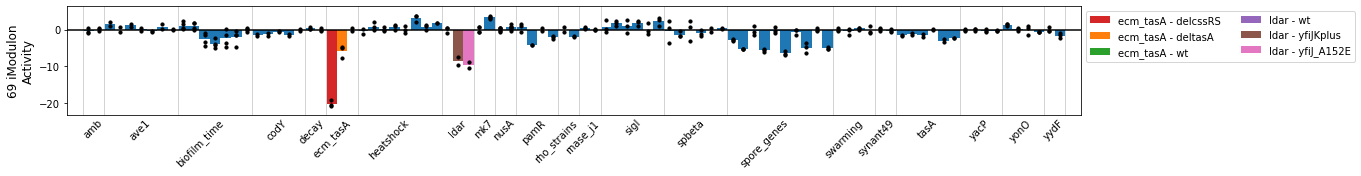

In [46]:
plot_activities(ica_data,69,highlight=['ecm_tasA','ldar'])

In [47]:
DF_enrichments[DF_enrichments.imodulon=='69'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
93,69,NaN,0.000002,0.000604,0.285714,1.0,0.444444,2.0,2.0,7.0,NaN,M00448,NaN,NaN,NaN


In [48]:
# Update the ICA data object

ica_data.rename_imodulons({69:'putative-cssRS'})
ica_data.imodulon_table.loc['putative-cssRS','category'] = 'functional'

### iModulon 70: Unknown

In [49]:
ica_data.view_imodulon(70)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_01000,-0.062140,secE,AL009126.3,BSU01000,117532,117711,+,preprotein translocase subunit,"Intracellular trafficking, secretion, and vesi...",Q06799,Op62,"SigA,AbrB"
BSU_02080,-0.053151,ybxH,AL009126.3,BSU02080,228331,228522,+,conserved protein of unknown function,Function unknown,P54426,Op154,"SpoVT,SigG"
BSU_02585,0.065121,BSU_02585,AL009126.3,BSU02585,281675,281809,-,hypothetical protein,No COG annotation,A0A2K4Z9H7,Op192,NaN
BSU_03788,-0.058862,yczM,AL009126.3,BSU03788,430185,430274,-,putative type I toxin,No COG annotation,C0H3V0,Op285,NaN
BSU_03789,0.063835,yczN,AL009126.3,BSU03789,430356,430469,-,putative spore and germination protein,No COG annotation,C0H3V1,Op286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
BSU_39139,0.081856,yxzJ,AL009126.3,BSU39139,4019005,4019136,-,conserved protein of unknown function,No COG annotation,C0H3T5,Op3025,NaN
BSU_40120,-0.061538,ptsJ,AL009126.3,BSU40120,4122619,4122849,-,glucose phosphotransferase system enzyme IIA c...,Carbohydrate transport and metabolism,O32292,Op3077,NaN
BSU_40160,0.059322,liaK,AL009126.3,BSU40160,4125742,4126500,-,membrane metalloprotease acting on modified fa...,"Post-translational modification, protein turno...",Q45594,Op3080,"Rok,SigA,AbrB"
BSU_40310,-0.066793,phrG,AL009126.3,BSU40310,4141358,4141474,+,secreted regulator of the activity of phosphat...,No COG annotation,O32295,Op3092,"SigA,SinR,RghR,SigH,CcpA"


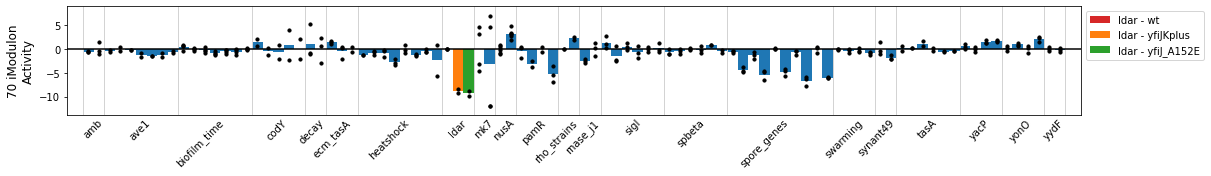

In [50]:
plot_activities(ica_data,70,highlight=['ldar'])

In [51]:
# Update the ica_data object
ica_data.rename_imodulons({70:'uncharacterized-6'})

### iModulon 71: Putative yxi-operon

In [52]:
ica_data.view_imodulon(71)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon,regulator
BSU_39120,0.107038,yxiM,AL009126.3,BSU39120,4017508,4018656,-,esterase (lipoprotein),Amino acid transport and metabolism,P42304,Op3023,NaN
BSU_39129,0.111279,yxzI,AL009126.3,NaN,4018786,4018974,-,hypothetical protein,No COG annotation,NaN,Op3024,NaN
BSU_39139,0.113504,yxzJ,AL009126.3,BSU39139,4019005,4019136,-,conserved protein of unknown function,No COG annotation,C0H3T5,Op3025,NaN
BSU_39140,0.116876,yxiK,AL009126.3,BSU39140,4019148,4019609,-,conserved protein of unknown function,No COG annotation,P42302,Op3026,NaN
BSU_39150,0.115552,yxiJ,AL009126.3,BSU39150,4019625,4019921,-,conserved protein of unknown function,Function unknown,P42320,Op3027,NaN
BSU_39160,0.127599,yxiI,AL009126.3,BSU39160,4019949,4020437,-,conserved protein of unknown function,Function unknown,P42301,Op3028,NaN
BSU_39170,0.133228,yxzG,AL009126.3,BSU39170,4020455,4020907,-,putative nucleic acid binding protein,No COG annotation,O32285,Op3029,NaN
BSU_39180,0.130903,yxiH,AL009126.3,BSU39180,4020977,4021306,-,conserved protein of unknown function,No COG annotation,P42300,Op3030,NaN
BSU_39190,0.141250,yxiG,AL009126.3,BSU39190,4021429,4021845,-,conserved hypothetical protein,No COG annotation,P42299,Op3031,NaN
BSU_39200,0.130152,yxzC,AL009126.3,BSU39200,4021896,4022264,-,putative nucleic acid binding protein,No COG annotation,O32286,Op3032,NaN


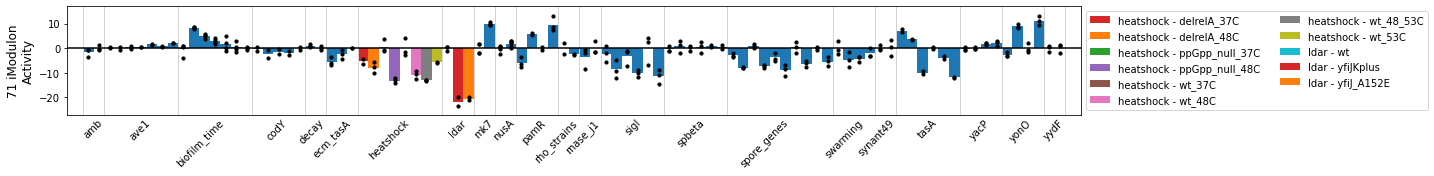

In [53]:
plot_activities(ica_data,71,highlight=['ldar','heatshock'])

In [54]:
# Update ICA data object
ica_data.rename_imodulons({71:'yxi-operon'})
ica_data.imodulon_table.loc['yxi-operon','category'] = 'functional'

# Double-check low-scoring iModulons

In [55]:
ica_data.imodulon_table[ica_data.imodulon_table['f1score']  < 0.25]

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene,explained_variance,category
CsoR/Fnr,CsoR/Fnr,1.842216e-11,8.799896e-07,0.113636,0.400000,0.176991,10.0,25.0,88,2.0,NaN,0.018237,regulatory
RhgR,RhgR,4.739042e-13,1.611274e-11,0.062500,1.000000,0.117647,8.0,8.0,128,1.0,NaN,0.019527,regulatory
NusA,NusA,1.788207e-11,7.510469e-10,0.054264,1.000000,0.102941,7.0,7.0,129,1.0,NaN,0.011770,regulatory
CsoR,CsoR,1.163609e-10,8.145265e-10,0.127273,0.500000,0.202899,7.0,14.0,55,1.0,NaN,0.015380,regulatory
DegU,DegU,2.854706e-11,1.427353e-10,0.370370,0.119048,0.180180,10.0,84.0,27,1.0,NaN,0.005933,regulatory
Rok,Rok,6.692924e-17,1.673231e-15,0.156250,0.441176,0.230769,15.0,34.0,96,1.0,NaN,0.008361,regulatory
YonO-2,YonO,4.492705e-08,8.985409e-08,0.416667,0.121951,0.188679,5.0,41.0,12,1.0,NaN,0.000940,regulatory
AbrB,AbrB,6.614330e-22,8.598629e-21,0.869565,0.073801,0.136054,20.0,271.0,23,1.0,NaN,0.024879,regulatory
CcpA-2,CcpA,4.279881e-27,6.419821e-26,0.812500,0.099237,0.176871,26.0,262.0,32,1.0,NaN,0.008381,regulatory


In [56]:
def clear_row(imodulon):
    clear_columns = ['regulator','pvalue','qvalue','precision','recall','f1score','TP','regulon_size','n_regs']
    
    for col in clear_columns:
        ica_data.imodulon_table.loc[imodulon,col] = None

### CsoR/Fnr -> SPbeta-1

In [57]:
ica_data.imodulon_table.loc['CsoR/Fnr']

regulator                CsoR/Fnr
pvalue                1.84222e-11
qvalue                 8.7999e-07
precision                0.113636
recall                        0.4
f1score                  0.176991
TP                             10
regulon_size                   25
imodulon_size                  88
n_regs                          2
single_gene                   NaN
explained_variance      0.0182374
category               regulatory
Name: CsoR/Fnr, dtype: object

In [58]:
DF_enrichments[DF_enrichments.imodulon=='CsoR/Fnr'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
30,CsoR/Fnr,NaN,6.770882e-80,1.936472e-77,0.772727,0.361702,0.492754,68.0,188.0,88.0,NaN,NaN,NaN,NaN,SP-beta prophage
31,CsoR/Fnr,NaN,7.175086e-65,1.026037e-62,0.772727,0.233677,0.358839,68.0,291.0,88.0,NaN,NaN,NaN,NaN,prophages
32,CsoR/Fnr,NaN,1.953503e-63,1.862339e-61,0.772727,0.223684,0.346939,68.0,304.0,88.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
33,CsoR/Fnr,NaN,3.678034e-07,2.629795e-05,0.056818,0.555556,0.103093,5.0,9.0,88.0,NaN,NaN,NaN,NaN,anaerobic respiration
35,CsoR/Fnr,NaN,8.372872e-05,3.991069e-03,0.068182,0.162162,0.096000,6.0,37.0,88.0,NaN,NaN,NaN,NaN,respiration
34,CsoR/Fnr,NaN,1.866140e-05,1.067432e-03,0.045455,0.444444,0.082474,4.0,9.0,88.0,NaN,NaN,NaN,NaN,overflow metabolism
10,CsoR/Fnr,NaN,3.111113e-04,7.000005e-02,0.045455,0.235294,0.076190,4.0,17.0,88.0,NaN,map00910,Nitrogen metabolism,NaN,NaN
10,CsoR/Fnr,NaN,8.144105e-06,2.190764e-03,0.034091,1.000000,0.065934,3.0,3.0,88.0,NaN,M00529,NaN,"Denitrification, nitrate => nitrogen",NaN
11,CsoR/Fnr,NaN,1.557860e-04,2.095322e-02,0.034091,0.500000,0.063830,3.0,6.0,88.0,NaN,M00530,NaN,"Dissimilatory nitrate reduction, nitrate => am...",NaN
12,CsoR/Fnr,NaN,4.093833e-04,3.670804e-02,0.022727,1.000000,0.044444,2.0,2.0,88.0,NaN,M00804,NaN,"Complete nitrification, comammox, ammonia => n...",NaN


In [59]:
# Update the ICA data object

ica_data.rename_imodulons({'CsoR/Fnr':'SPbeta-1'})
ica_data.imodulon_table.loc['SPbeta-1','category'] = 'functional'
clear_row('SPbeta-1')

### RhgR -> Carbon metabolism/skin element

In [60]:
ica_data.imodulon_table.loc['RhgR']

regulator                    RhgR
pvalue                4.73904e-13
qvalue                1.61127e-11
precision                  0.0625
recall                          1
f1score                  0.117647
TP                              8
regulon_size                    8
imodulon_size                 128
n_regs                          1
single_gene                   NaN
explained_variance      0.0195274
category               regulatory
Name: RhgR, dtype: object

In [61]:
DF_enrichments[DF_enrichments.imodulon=='RhgR'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
83,RhgR,NaN,4.916032e-15,7.029925e-13,0.257812,0.143478,0.184358,33.0,239.0,128.0,NaN,NaN,NaN,NaN,utilization of specific carbon sources
82,RhgR,NaN,3.414975e-18,9.766827e-16,0.093750,0.923077,0.170213,12.0,13.0,128.0,NaN,NaN,NaN,NaN,utilization of pectin
84,RhgR,NaN,2.442151e-12,2.328184e-10,0.257812,0.116197,0.160194,33.0,299.0,128.0,NaN,NaN,NaN,NaN,carbon metabolism
85,RhgR,NaN,1.883701e-10,1.346846e-08,0.117188,0.238095,0.157068,15.0,63.0,128.0,NaN,NaN,NaN,NaN,Skin element
90,RhgR,NaN,2.879252e-04,9.149623e-03,0.156250,0.068729,0.095465,20.0,291.0,128.0,NaN,NaN,NaN,NaN,prophages
91,RhgR,NaN,5.123535e-04,1.465331e-02,0.156250,0.065789,0.092593,20.0,304.0,128.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
92,RhgR,NaN,1.857884e-03,4.830500e-02,0.187500,0.054920,0.084956,24.0,437.0,128.0,NaN,NaN,NaN,NaN,transporters
93,RhgR,NaN,3.471510e-03,8.273765e-02,0.109375,0.066351,0.082596,14.0,211.0,128.0,NaN,NaN,NaN,NaN,ABC transporters
24,RhgR,NaN,2.234027e-05,3.004766e-03,0.039062,0.384615,0.070922,5.0,13.0,128.0,NaN,M00429,NaN,NaN,NaN
88,RhgR,NaN,7.057531e-05,2.883505e-03,0.039062,0.312500,0.069444,5.0,16.0,128.0,NaN,NaN,NaN,NaN,utilization of hexuronate


In [62]:
# Update the ICA data object

ica_data.rename_imodulons({'RhgR':'carbon metabolism/skin element'})
ica_data.imodulon_table.loc['carbon metabolism/skin element','category'] = 'functional'
clear_row('carbon metabolism/skin element')

## NusA -> ComK/LevR/NusA

In [63]:
ica_data.imodulon_table.loc['NusA']

regulator                    NusA
pvalue                1.78821e-11
qvalue                7.51047e-10
precision               0.0542636
recall                          1
f1score                  0.102941
TP                              7
regulon_size                    7
imodulon_size                 129
n_regs                          1
single_gene                   NaN
explained_variance      0.0117704
category               regulatory
Name: NusA, dtype: object

In [64]:
DF_enrichments[DF_enrichments.imodulon=='NusA'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
206,NusA,NaN,7.520894e-07,1.075488e-04,0.147287,0.107955,0.124590,19.0,187.0,129.0,NaN,NaN,NaN,NaN,genetics
57,NusA,NaN,5.731914e-10,1.541885e-07,0.062016,0.615385,0.112676,8.0,13.0,129.0,NaN,M00429,NaN,NaN,NaN
207,NusA,NaN,2.144949e-06,2.044851e-04,0.077519,0.192308,0.110497,10.0,104.0,129.0,NaN,NaN,NaN,NaN,genetic competence
76,NusA,NaN,2.640817e-08,5.941839e-06,0.054264,0.538462,0.098592,7.0,13.0,129.0,NaN,map00290,"Valine, leucine and isoleucine biosynthesis",NaN,NaN
205,NusA,NaN,2.708177e-07,7.745386e-05,0.054264,0.411765,0.095890,7.0,17.0,129.0,NaN,NaN,NaN,NaN,biosynthesis/ acquisition of branched-chain am...
209,NusA,NaN,5.143547e-04,2.788112e-02,0.209302,0.057447,0.090150,27.0,470.0,129.0,NaN,NaN,NaN,NaN,sporulation proteins
78,NusA,NaN,1.253048e-05,9.397862e-04,0.054264,0.250000,0.089172,7.0,28.0,129.0,NaN,map01210,2-Oxocarboxylic acid metabolism,NaN,NaN
212,NusA,NaN,2.183264e-03,7.805167e-02,0.317829,0.045354,0.079380,41.0,1131.0,129.0,NaN,NaN,NaN,NaN,Information processing
213,NusA,NaN,2.457999e-03,7.810976e-02,0.054264,0.111111,0.072917,7.0,63.0,129.0,NaN,NaN,NaN,NaN,Skin element
210,NusA,NaN,5.849187e-04,2.788112e-02,0.046512,0.166667,0.072727,6.0,36.0,129.0,NaN,NaN,NaN,NaN,tRNA modification and maturation


In [65]:
ica_data.compute_trn_enrichment('NusA', max_regs=3,force=True,save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,NusA,ComK/LevR/NusA,2.191960e-21,7.674319e-15,0.193798,0.352113,0.250000,25.0,71.0,129.0,3.0
1,NusA,LevR/OhrR/NusA,8.056984e-21,1.410424e-14,0.100775,1.000000,0.183099,13.0,13.0,129.0,3.0
2,NusA,LevR/YfmP/NusA,1.099801e-19,6.417561e-14,0.100775,0.928571,0.181818,13.0,14.0,129.0,3.0
3,NusA,ComK/SigL/NusA,7.419812e-20,6.417561e-14,0.201550,0.292135,0.238532,26.0,89.0,129.0,3.0
4,NusA,ComK/NusA/T-box,6.486468e-20,6.417561e-14,0.217054,0.261682,0.237288,28.0,107.0,129.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
460,NusA,ComK/SigG/MalR,1.287429e-09,9.758854e-06,0.193798,0.119048,0.147493,25.0,210.0,129.0,3.0
461,NusA,ComK/SigG/SacY,1.287429e-09,9.758854e-06,0.193798,0.119048,0.147493,25.0,210.0,129.0,3.0
462,NusA,SigL/MhqR/T-box,1.290543e-09,9.758854e-06,0.116279,0.211268,0.150000,15.0,71.0,129.0,3.0
463,NusA,NusA/MhqR,1.304144e-09,9.819285e-06,0.062016,0.571429,0.111888,8.0,14.0,129.0,2.0


In [66]:
# Update the ICA data object

ica_data.rename_imodulons({'NusA':'ComK/LevR/NusA'})

## CsoR -> SPbeta-2

In [67]:
ica_data.imodulon_table.loc['CsoR']

regulator                    CsoR
pvalue                1.16361e-10
qvalue                8.14527e-10
precision                0.127273
recall                        0.5
f1score                  0.202899
TP                              7
regulon_size                   14
imodulon_size                  55
n_regs                          1
single_gene                   NaN
explained_variance      0.0153802
category               regulatory
Name: CsoR, dtype: object

In [68]:
DF_enrichments[DF_enrichments.imodulon=='CsoR'].sort_values('f1score',ascending=False)

,imodulon,annotation,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,source,kegg_id,pathway_name,module_name,value
214,CsoR,NaN,4.560304e-76,1.304247e-73,0.981818,0.287234,0.444444,54.0,188.0,55.0,NaN,NaN,NaN,NaN,SP-beta prophage
215,CsoR,NaN,1.937387e-64,2.770463e-62,0.981818,0.185567,0.312139,54.0,291.0,55.0,NaN,NaN,NaN,NaN,prophages
216,CsoR,NaN,2.598987e-63,2.477701e-61,0.981818,0.177632,0.300836,54.0,304.0,55.0,NaN,NaN,NaN,NaN,Prophages and mobile genetic elements
64,CsoR,NaN,2.192982e-04,5.899121e-02,0.054545,0.300000,0.092308,3.0,10.0,55.0,NaN,M00053,NaN,"Pyrimidine deoxyribonuleotide biosynthesis, CD...",NaN
217,CsoR,NaN,9.373689e-04,6.702187e-02,0.036364,0.500000,0.067797,2.0,4.0,55.0,NaN,NaN,NaN,NaN,DNA replication/ based on similarity


In [69]:
# Update the ICA data object

ica_data.rename_imodulons({'CsoR':'SPbeta-2'})
ica_data.imodulon_table.loc['SPbeta-2','category'] = 'functional'
clear_row('SPbeta-2')

## Xpf

In [70]:
ica_data.compute_trn_enrichment('Xpf',max_regs=2,save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,Xpf,Xre/Xpf,5.255146e-69,2.509332e-64,0.611111,1.000000,0.758621,33.0,33.0,54.0,2.0
1,Xpf,Xpf,1.548917e-55,3.698039e-51,0.500000,1.000000,0.666667,27.0,27.0,54.0,1.0
2,Xpf,Xpf/YclJ,2.809484e-50,4.471762e-46,0.518519,0.777778,0.622222,28.0,36.0,54.0,2.0
3,Xpf,Xpf/FadR,4.263676e-49,5.089764e-45,0.537037,0.674419,0.597938,29.0,43.0,54.0,2.0
4,Xpf,Xpf/LexA,1.367897e-41,1.306342e-37,0.574074,0.369048,0.449275,31.0,84.0,54.0,2.0
5,Xpf,SigM/Xpf,9.957493e-31,7.924505e-27,0.518519,0.233333,0.321839,28.0,120.0,54.0,2.0
6,Xpf,Xpf/AbrB,1.074619e-21,7.330439e-18,0.555556,0.100671,0.170455,30.0,298.0,54.0,2.0
7,Xpf,Xre,2.851014e-12,1.701699e-08,0.111111,1.000000,0.200000,6.0,6.0,54.0,1.0
8,Xpf,Xre/FadR,9.651932e-11,5.120886e-07,0.148148,0.363636,0.210526,8.0,22.0,54.0,2.0
9,Xpf,Xre/YclJ,1.888649e-10,9.018299e-07,0.129630,0.466667,0.202899,7.0,15.0,54.0,2.0


In [71]:
ica_data.rename_imodulons({'Xpf':'Xre/Xpf'})

## Adjust some thresholds

In [72]:
ica_data.change_threshold('Thi-box',.1)
ica_data.change_threshold('LnrK',.15)
ica_data.change_threshold('KipR',0.12)

# Recalculate enrichments
ica_data.compute_trn_enrichment(['Thi-box','LnrK','KipR'], save=True)

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs
0,Thi-box,Thi-box,1.033185e-33,1.033185e-33,1.0,0.857143,0.923077,12.0,14.0,12.0,1.0
1,LnrK,LnrK,0.000000e+00,0.000000e+00,1.0,1.000000,1.000000,3.0,3.0,3.0,1.0
2,KipR,KipR,0.000000e+00,0.000000e+00,1.0,1.000000,1.000000,7.0,7.0,7.0,1.0
3,KipR,TnrA,8.103543e-13,1.620709e-12,1.0,0.083333,0.153846,7.0,84.0,7.0,1.0


# Add biological functions
This is only relevant for 'biological' and 'regulatory iModulons

In [73]:
subti_annot = pd.read_csv(path.join('..','data','external','subtiwiki_categories.csv'))
subti_annot.rename({'BSU_number':'gene_id'},axis=1,inplace=True)
subti_annot = subti_annot[subti_annot.gene_id.isin(ica_data.gene_names)]

In [74]:
subti_enrich = ica_data.compute_annotation_enrichment(subti_annot,'FuncName2')
functions = subti_enrich.sort_values('qvalue').drop_duplicates('imodulon').set_index('imodulon')['FuncName2']
functions = functions[ica_data.imodulon_table.category.isin(['regulatory','functional'])]
functions.head()

imodulon
SPbeta-1      prophages
SPbeta-2      prophages
SigK        sporulation
SigE        sporulation
Fur         homeostasis
Name: FuncName2, dtype: object

In [75]:
ica_data.imodulon_table['function'] = functions

## Manually curate functions

In [76]:
ica_data.imodulon_table.function.value_counts()

carbon metabolism                                    8
amino acid/ nitrogen metabolism                      6
coping with stress                                   6
prophages                                            5
nucleotide metabolism                                3
sporulation                                          3
exponential and early post-exponential lifestyles    3
homeostasis                                          3
electron transport and ATP synthesis                 3
transporters                                         2
additional metabolic pathways                        2
proteins of unknown function                         2
lipid metabolism                                     1
ncRNA                                                1
short peptides                                       1
essential genes                                      1
mobile genetic elements/ based on similarity         1
cell envelope and cell division                      1
mobile gen

In [77]:
rename = {'carbon metabolism':'Carbon Metabolism',
          'coping with stress':'Stress Response',
          'amino acid/ nitrogen metabolism':'AA/Nucleotide Metabolism',
          'prophages':'Prophages',
          'sporulation':'Lifestyles',
          'exponential and early post-exponential lifestyles':'Lifestyles',
          'electron transport and ATP synthesis': 'Misc. Metabolism',
          'homeostasis':'Homeostasis',
          'nucleotide metabolism':'AA/Nucleotide Metabolism',
          'proteins of unknown function':'Other',
          'additional metabolic pathways':'Misc. Metabolism',
          'short peptides':'Cellular Processes',
          'essential genes':'Cellular Processes',
          'transporters':'Misc. Metabolism',
          'mobile genetic elements': 'Cellular Processes',
          'ncRNA':'Cellular Processes',
          'mobile genetic elements/ based on similarity':'Cellular Processes',
          'lipid metabolism':'Misc. Metabolism',
          'cell envelope and cell division': 'Cellular Processes',
          'genetics':'Cellular Processes'}

In [78]:
ica_data.imodulon_table.function = ica_data.imodulon_table.function.replace(rename)

In [79]:
ica_data.imodulon_table.loc['ybc-operon','function'] = 'Prophages'
ica_data.imodulon_table.loc['SigI','function'] = 'Stress Response'
ica_data.imodulon_table.loc['LnrK','function'] = 'Cellular Processes'
ica_data.imodulon_table.loc['early-biofilm','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['KipR','function'] = 'Misc. Metabolism'
ica_data.imodulon_table.loc['AbrB','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['putative-cssRS','function'] = 'Lifestyles'
ica_data.imodulon_table.loc['YvaF','function'] = 'Other'

In [80]:
ica_data.imodulon_table.function.value_counts()

AA/Nucleotide Metabolism    9
Lifestyles                  9
Carbon Metabolism           8
Cellular Processes          8
Misc. Metabolism            8
Stress Response             7
Prophages                   6
Homeostasis                 3
Other                       3
Name: function, dtype: int64

## Fill in Uncharacterized and Single Gene iModulons

In [81]:
ica_data.imodulon_table.function = ['Uncharacterized' if row.category == 'uncharacterized' else
                                    'Single Gene' if row.category == 'single_gene' else row.function
                                    for i,row in ica_data.imodulon_table.iterrows()]


# Save final ICA data object

In [82]:
save_to_json(ica_data, path.join(data_dir, 'bsu.json.gz'))

In [83]:
ica_data.imodulon_table.to_csv(path.join(data_dir, 'imodulon_table.csv'))